In [2]:
from utils import *
from NeuralNetwork import *
import pandas as pd
import numpy as np
import warnings
# to ignore pandas warning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Training
The choice of the number of neurons and the output layer's activation function was taken making some tests on the dataset, instead the we choose **tanh** as the hidden layer's activation function because it performs very well with xavier weight initializzation as stated in the paper on **https://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf**

## Monk1


#### Variance and mean of MSE and Accuracy over 10 training instances of the model **{eta = 0.175, mb = 1, alpha (momentum) = 0.85}** 
The research of the set of hyperparameters has begun from a grid-search and it was refined with some tests choosing a set which makes the model able to yield an accuracy of 100% with low variance on MSE (test set) over different training instances

In [3]:
%%time
col_names = ["Class", "a1", "a2", "a3", "a4", "a5", "a6", "ID"]

tr_data = pd.read_csv("../monk+s+problems/monks-1.train", sep =" ",  names = col_names)
test_data = pd.read_csv("../monk+s+problems/monks-1.test", sep =" ",  names = col_names)


epochs=500
params={
    "eta" : 0.175,
    "mb" : 1,
    "momentum" : 0.85,
    "epochs" : epochs,
    "clip_value" : None,
    "hid_act_fun" : "tanh",
    "out_act_fun" : "sigmoid",
    "cost_fun" : "mse",
    "ridge_lambda":None,
    "lasso_lambda": None,
    "decay_max_steps": None,
    "decay_min_value": None
}
n=10
test_errors=np.zeros((n,epochs))
training_errors=np.zeros((n,epochs))
acc_test_errors=np.zeros((n,epochs))
acc_train_errors=np.zeros((n,epochs))
for i in range(n):
    tr = process_monk_data(tr_data)
    test = process_monk_data(test_data)
    net = NeuralNetwork()

    n_inputs = tr.shape[1] - 2

    net.add_input_layer(n_inputs)

    net.add_hidden_layer(n_inputs, 4)

    net.add_output_layer(4, 1)
    test_error,training_error,acc_test,acc_train=net.train(tr,params,test_data=test,type="monk",outFun2="accuracy")
    test_errors[i]=test_error
    training_errors[i]=training_error
    acc_test_errors[i]=acc_test
    acc_train_errors[i]=acc_train
    print(acc_test[-1])

print("Train")
print(f"MSE: mean = {np.mean(training_errors[:,-1])}, Var = {np.var(training_errors[:,-1])}")
print(f"Accuracy: mean = {np.mean(acc_train_errors[:,-1])}, Var = {np.var(acc_train_errors[:,-1])}")
print("Test")
print(f"MSE: mean = {np.mean(test_errors[:,-1])}, Var = {np.var(test_errors[:,-1])}")
print(f"Accuracy: mean = {np.mean(acc_test_errors[:,-1])}, Var = {np.var(acc_test_errors[:,-1])}")

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
Train
MSE: mean = 1.196957012135744e-05, Var = 2.406391960405493e-11
Accuracy: mean = 1.0, Var = 0.0
Test
MSE: mean = 2.0190266794935484e-05, Var = 1.1370159526626538e-10
Accuracy: mean = 1.0, Var = 0.0
CPU times: total: 14min 51s
Wall time: 14min 52s


#### Hyperparameters = {eta = 0.175, mb = 1, alpha (momentum) = 0.85}

MSE(tr) = 9.427375402181886e-06, MSE(test) = 1.9425302882058e-05
Accuracy(tr) = 1.0, Accuracy(test) = 1.0


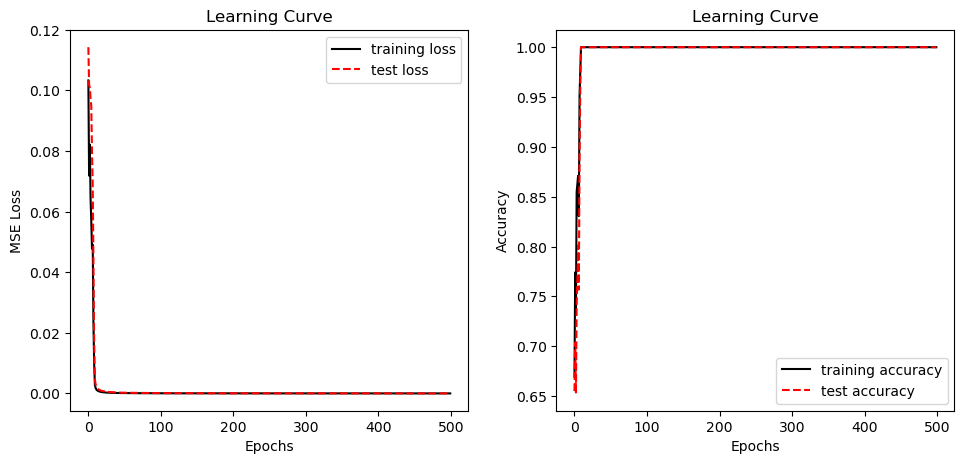

CPU times: total: 1min 30s
Wall time: 1min 30s


In [8]:
%%time
params={
    "eta" : 0.175,
    "mb" : 1,
    "momentum" : 0.85,
    "epochs" : 500,
    "clip_value" : None,
    "hid_act_fun" : "tanh",
    "out_act_fun" : "sigmoid",
    "cost_fun" : "mse",
    "ridge_lambda":None,
    "lasso_lambda": None,
    "decay_max_steps": None,
    "decay_min_value": None
}

fig,axs = plt.subplots(1,2,figsize=(10,5))
col_names = ["Class", "a1", "a2", "a3", "a4", "a5", "a6", "ID"]

tr_data = pd.read_csv("../monk+s+problems/monks-1.train", sep =" ",  names = col_names)
test_data = pd.read_csv("../monk+s+problems/monks-1.test", sep =" ",  names = col_names)


#creazione rete
tr = process_monk_data(tr_data)
test = process_monk_data(test_data)
net = NeuralNetwork()

n_inputs = tr.shape[1] - 2
net.add_input_layer(n_inputs)
net.add_hidden_layer(n_inputs, 4)
net.add_output_layer(4, 1)

#training 
test_error,training_error,acc_test,acc_train=net.train(tr,params,test_data=test,type="monk",outFun2="accuracy")
print(f"MSE(tr) = {training_error[-1]}, MSE(test) = {test_error[-1]}")
print(f"Accuracy(tr) = {acc_train[-1]}, Accuracy(test) = {acc_test[-1]}")

plot_loss_Monk(training_error,"mse",axs[0],test_losses=test_error)
plot_loss_Monk(acc_train,"acc",axs[1],test_losses=acc_test)


fig.tight_layout(pad=2.0)
plt.show()

## Monk 2

#### Variance and mean of MSE and Accuracy over 10 training instances of the model **{eta = 0.02, mb = 1, alpha (momentum) = 0.85}** 

In [18]:
%%time
col_names = ["Class", "a1", "a2", "a3", "a4", "a5", "a6", "ID"]

tr_data = pd.read_csv("../monk+s+problems/monks-2.train", sep =" ",  names = col_names)
test_data = pd.read_csv("../monk+s+problems/monks-2.test", sep =" ",  names = col_names)


epochs=500
params={
    "eta" : 0.02,
    "mb" : 1,
    "momentum" : 0.85,
    "epochs" : epochs,
    "clip_value" : None,
    "hid_act_fun" : "tanh",
    "out_act_fun" : "sigmoid",
    "cost_fun" : "mse",
    "ridge_lambda":None,
    "lasso_lambda": None,
    "decay_max_steps": None,
    "decay_min_value": None
}
n=10
test_errors=np.zeros((n,epochs))
training_errors=np.zeros((n,epochs))
acc_test_errors=np.zeros((n,epochs))
acc_train_errors=np.zeros((n,epochs))
for i in range(n):
    tr = process_monk_data(tr_data)
    test = process_monk_data(test_data)
    net = NeuralNetwork()

    n_inputs = tr.shape[1] - 2

    net.add_input_layer(n_inputs)

    net.add_hidden_layer(n_inputs, 4)

    net.add_output_layer(4, 1)
    test_error,training_error,acc_test,acc_train=net.train(tr,params,test_data=test,type="monk",outFun2="accuracy")
    test_errors[i]=test_error
    training_errors[i]=training_error
    acc_test_errors[i]=acc_test
    acc_train_errors[i]=acc_train
    print(acc_test[-1])


print("Train")
print(f"MSE: mean = {np.mean(training_errors[:,-1])}, Var = {np.var(training_errors[:,-1])}")
print(f"Accuracy: mean = {np.mean(acc_train_errors[:,-1])}, Var = {np.var(acc_train_errors[:,-1])}")
print("Test")
print(f"MSE: mean = {np.mean(test_errors[:,-1])}, Var = {np.var(test_errors[:,-1])}")
print(f"Accuracy: mean = {np.mean(acc_test_errors[:,-1])}, Var = {np.var(acc_test_errors[:,-1])}")


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
Train
MSE: mean = 7.483684107634336e-05, Var = 1.5513032830287626e-10
Accuracy: mean = 1.0, Var = 0.0
Test
MSE: mean = 0.00010795213032860175, Var = 4.914435628104127e-10
Accuracy: mean = 1.0, Var = 0.0
CPU times: user 29min 35s, sys: 692 ms, total: 29min 36s
Wall time: 29min 36s


#### Hyperparameters = {eta = 0.02, mb = 1, alpha (momentum) = 0.85}

MSE(tr) = 9.007244260045007e-05, MSE(test) = 0.00015662645509728027
Accuracy(tr) = 1.0, Accuracy(test) = 1.0


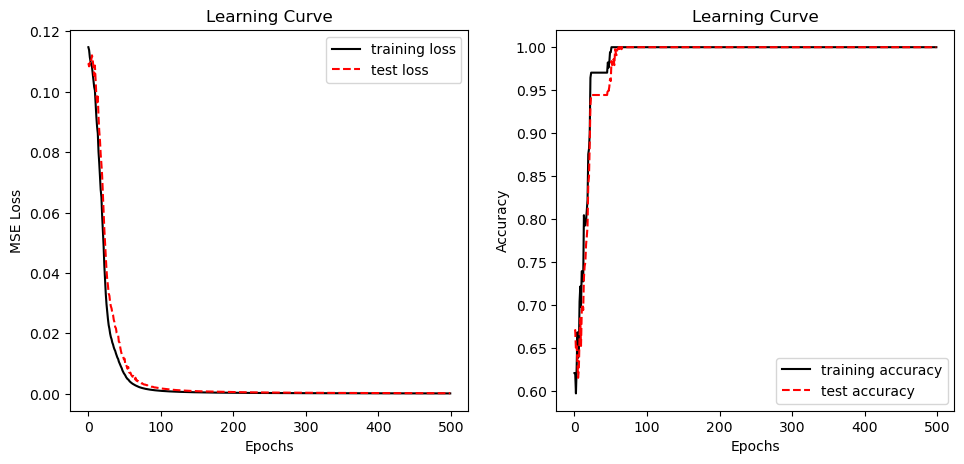

CPU times: total: 2min 3s
Wall time: 2min 3s


In [8]:
%%time
params={
    "eta" : 0.02,
    "mb" : 1,
    "momentum" : 0.85,
    "epochs" : 500,
    "clip_value" : None,
    "hid_act_fun" : "tanh",
    "out_act_fun" : "sigmoid",
    "cost_fun" : "mse",
    "ridge_lambda":None,
    "lasso_lambda": None,
    "decay_max_steps": None,
    "decay_min_value": None
}

fig,axs = plt.subplots(1,2,figsize=(10,5))
col_names = ["Class", "a1", "a2", "a3", "a4", "a5", "a6", "ID"]

tr_data = pd.read_csv("../monk+s+problems/monks-2.train", sep =" ",  names = col_names)
test_data = pd.read_csv("../monk+s+problems/monks-2.test", sep =" ",  names = col_names)


#creazione rete
tr = process_monk_data(tr_data)
test = process_monk_data(test_data)
net = NeuralNetwork()

n_inputs = tr.shape[1] - 2
net.add_input_layer(n_inputs)
net.add_hidden_layer(n_inputs, 4)
net.add_output_layer(4, 1)

#training 
test_error,training_error,acc_test,acc_train=net.train(tr,params,test_data=test,outFun2="accuracy",type="monk")
print(f"MSE(tr) = {training_error[-1]}, MSE(test) = {test_error[-1]}")
print(f"Accuracy(tr) = {acc_train[-1]}, Accuracy(test) = {acc_test[-1]}")

plot_loss_Monk(training_error,"mse",axs[0],test_losses=test_error)
plot_loss_Monk(acc_train,"acc",axs[1],test_losses=acc_test)


fig.tight_layout(pad=2.0)
plt.show()

## Monk 3 no reg

#### Variance and mean of MSE over 10 training instances of the model **{eta = 0.00025, mb = 1, alpha (momentum) = 0.99}** 


In [3]:
%%time
col_names = ["Class", "a1", "a2", "a3", "a4", "a5", "a6", "ID"]

tr_data = pd.read_csv("../monk+s+problems/monks-3.train", sep =" ",  names = col_names)
test_data = pd.read_csv("../monk+s+problems/monks-3.test", sep =" ",  names = col_names)


epochs=300
params={
    "eta" : 0.00025,
    "mb" : 1,
    "momentum" : 0.99,
    "epochs" : epochs,
    "clip_value" : None,
    "hid_act_fun" : "tanh",
    "out_act_fun" : "sigmoid",
    "cost_fun" : "mse",
    "ridge_lambda":None,
    "lasso_lambda": None,
    "decay_max_steps": None,
    "decay_min_value": None
}
n=10
test_errors=np.zeros((n,epochs))
training_errors=np.zeros((n,epochs))
acc_test_errors=np.zeros((n,epochs))
acc_train_errors=np.zeros((n,epochs))
for i in range(n):
    tr = process_monk_data(tr_data)
    test = process_monk_data(test_data)
    net = NeuralNetwork()

    n_inputs = tr.shape[1] - 2

    net.add_input_layer(n_inputs)

    net.add_hidden_layer(n_inputs, 4)

    net.add_output_layer(4, 1)
    test_error,training_error,acc_test,acc_train=net.train(tr,params,test_data=test,type="monk",outFun2="accuracy")
    test_errors[i]=test_error
    training_errors[i]=training_error
    acc_test_errors[i]=acc_test
    acc_train_errors[i]=acc_train

print("Train")
print(f"MSE: mean = {np.mean(training_errors[:,-1])}, Var = {np.var(training_errors[:,-1])}")
print(f"Accuracy: mean = {np.mean(acc_train_errors[:,-1])}, Var = {np.var(acc_train_errors[:,-1])}")
print("Test")
print(f"MSE: mean = {np.mean(test_errors[:,-1])}, Var = {np.var(test_errors[:,-1])}")
print(f"Accuracy: mean = {np.mean(acc_test_errors[:,-1])}, Var = {np.var(acc_test_errors[:,-1])}")

Train
MSE: mean = 0.016918730299026786, Var = 6.69614153157229e-06
Accuracy: mean = 0.9655737704918034, Var = 0.00014512227895726936
Test
MSE: mean = 0.02137979418567247, Var = 2.4486763359896076e-05
Accuracy: mean = 0.9472222222222222, Var = 0.00011016803840877924
CPU times: total: 9min
Wall time: 9min


#### Hyperparameters = {eta = 0.00025, mb = 1, alpha (momentum) = 0.99}

end Training
Accuracy = 0.9421296296296297


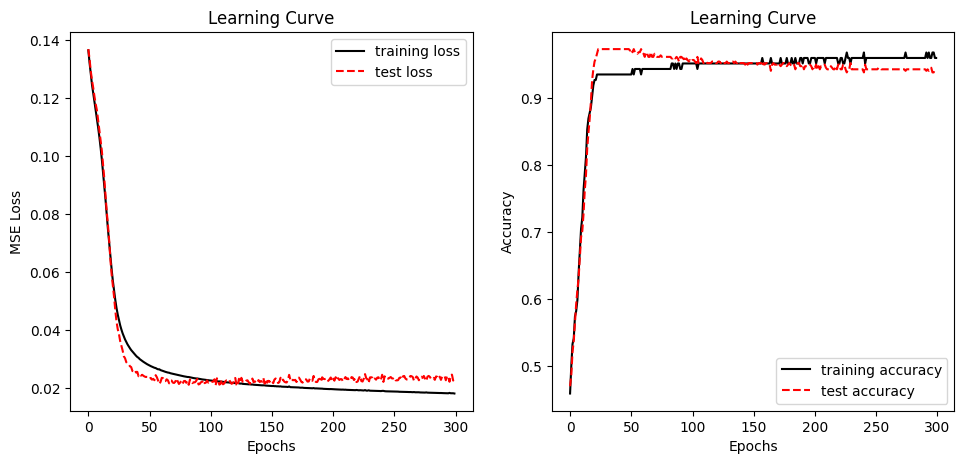

CPU times: user 56.8 s, sys: 180 ms, total: 57 s
Wall time: 56.7 s


In [8]:
%%time
params={
    "eta" : 0.00025,
    "mb" : 1,
    "momentum" : 0.99,
    "epochs" : 300,
    "clip_value" : None,
    "hid_act_fun" : "tanh",
    "out_act_fun" : "sigmoid",
    "cost_fun" : "mse",
    "ridge_lambda":None,
    "lasso_lambda": None,
    "decay_max_steps": None,
    "decay_min_value": None
}

fig,axs = plt.subplots(1,2,figsize=(10,5))
col_names = ["Class", "a1", "a2", "a3", "a4", "a5", "a6", "ID"]

tr_data = pd.read_csv("../monk+s+problems/monks-3.train", sep =" ",  names = col_names)
test_data = pd.read_csv("../monk+s+problems/monks-3.test", sep =" ",  names = col_names)


#creazione rete
tr = process_monk_data(tr_data)
test = process_monk_data(test_data)
net = NeuralNetwork()

n_inputs = tr.shape[1] - 2
net.add_input_layer(n_inputs)
net.add_hidden_layer(n_inputs, 4)
net.add_output_layer(4, 1)

#training 
test_error,training_error,acc_test,acc_train=net.train(tr,params,test_data=test,type="monk",outFun2="accuracy")
print(f"Accuracy = {acc_test[-1]}")

plot_loss_Monk(training_error,"mse",axs[0],test_losses=test_error)
plot_loss_Monk(acc_train,"acc",axs[1],test_losses=acc_test)


fig.tight_layout(pad=2.0)
plt.show()

## Monk 3 Regularized

#### Variance and mean of MSE and Accuracy over 10 training instances of the model:
#### **{eta = 0.00005, mb = 1, alpha (momentum) = 0.99, lambda (L2) = 5 x 10^-7}**


In [47]:
%%time
col_names = ["Class", "a1", "a2", "a3", "a4", "a5", "a6", "ID"]

tr_data = pd.read_csv("../monk+s+problems/monks-3.train", sep =" ",  names = col_names)
test_data = pd.read_csv("../monk+s+problems/monks-3.test", sep =" ",  names = col_names)


epochs=300
params={
    "eta" : 0.00005,
    "mb" : 1,
    "momentum" : 0.99,
    "epochs" : epochs,
    "clip_value" : None,
    "hid_act_fun" : "tanh",
    "out_act_fun" : "sigmoid",
    "cost_fun" : "mse",
    "ridge_lambda":0.0000005,
    "lasso_lambda": None,
    "decay_max_steps": None,
    "decay_min_value": None
}
n=10
test_errors=np.zeros((n,epochs))
training_errors=np.zeros((n,epochs))
acc_test_errors=np.zeros((n,epochs))
acc_train_errors=np.zeros((n,epochs))
for i in range(n):
    tr = process_monk_data(tr_data)
    test = process_monk_data(test_data)
    net = NeuralNetwork()

    n_inputs = tr.shape[1] - 2

    net.add_input_layer(n_inputs)

    net.add_hidden_layer(n_inputs, 4)

    net.add_output_layer(4, 1)
    test_error,training_error,acc_test,acc_train=net.train(tr,params,test_data=test,type="monk",outFun2="accuracy")
    test_errors[i]=test_error
    training_errors[i]=training_error
    acc_test_errors[i]=acc_test
    acc_train_errors[i]=acc_train

print("Train")
print(f"MSE: mean = {np.mean(training_errors[:,-1])}, Var = {np.var(training_errors[:,-1])}")
print(f"Accuracy: mean = {np.mean(acc_train_errors[:,-1])}, Var = {np.var(acc_train_errors[:,-1])}")
print("Test")
print(f"MSE: mean = {np.mean(test_errors[:,-1])}, Var = {np.var(test_errors[:,-1])}")
print(f"Accuracy: mean = {np.mean(acc_test_errors[:,-1])}, Var = {np.var(acc_test_errors[:,-1])}")

end Training
end Training
end Training
end Training
end Training
end Training
end Training
end Training
end Training
end Training
Train
MSE: mean = 0.05902430791067509, Var = 3.34344412031849e-07
Accuracy: mean = 0.9344262295081969, Var = 1.232595164407831e-32
Test
MSE: mean = 0.054905113879973245, Var = 3.997599519313019e-07
Accuracy: mean = 0.9722222222222221, Var = 1.232595164407831e-32
CPU times: user 13min 37s, sys: 304 ms, total: 13min 37s
Wall time: 13min 37s


#### Hyperparameters = {eta = 0.00005, mb = 1, alpha (momentum) = 0.99, lambda (L2) = 5 x 10^-7}

end Training
Accuracy = 0.9722222222222222


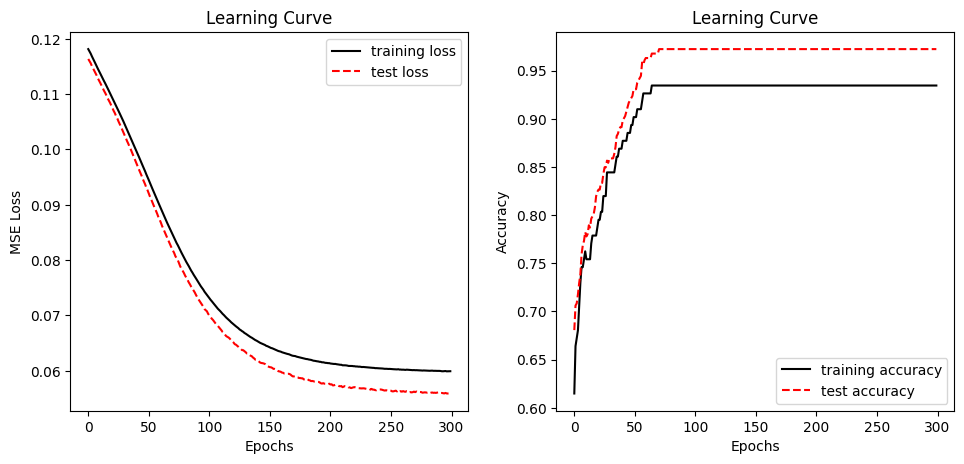

CPU times: user 1min 1s, sys: 200 ms, total: 1min 1s
Wall time: 1min 1s


In [14]:
%%time
params={
    "eta" : 0.00005,
    "mb" : 1,
    "momentum" : 0.99,
    "epochs" : 300,
    "clip_value" : None,
    "hid_act_fun" : "tanh",
    "out_act_fun" : "sigmoid",
    "cost_fun" : "mse",
    "ridge_lambda":0.0000005,
    "lasso_lambda": None,
    "decay_max_steps": None,
    "decay_min_value": None
}

fig,axs = plt.subplots(1,2,figsize=(10,5))
col_names = ["Class", "a1", "a2", "a3", "a4", "a5", "a6", "ID"]

tr_data = pd.read_csv("../monk+s+problems/monks-3.train", sep =" ",  names = col_names)
test_data = pd.read_csv("../monk+s+problems/monks-3.test", sep =" ",  names = col_names)


#creazione rete
tr = process_monk_data(tr_data)
test = process_monk_data(test_data)
net = NeuralNetwork()

n_inputs = tr.shape[1] - 2
net.add_input_layer(n_inputs)
net.add_hidden_layer(n_inputs, 4)
net.add_output_layer(4, 1)

#training 
test_error,training_error,acc_test,acc_train=net.train(tr,params,test_data=test,type="monk",outFun2="accuracy")
print(f"Accuracy = {acc_test[-1]}")

plot_loss_Monk(training_error,"mse",axs[0],test_losses=test_error)
plot_loss_Monk(acc_train,"acc",axs[1],test_losses=acc_test)


fig.tight_layout(pad=2.0)
plt.show()